<a href="https://colab.research.google.com/github/xDocka15/MPA-MLF_Dockal/blob/main/mlf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

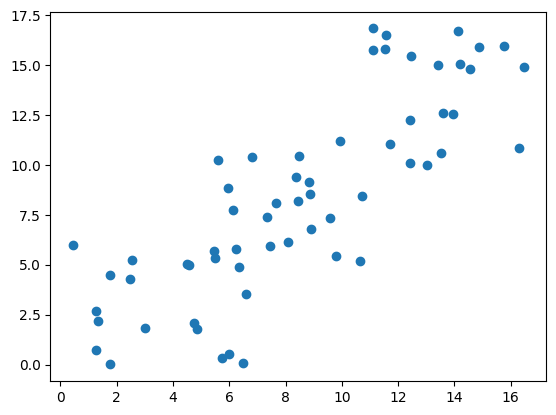

In [7]:
loaded_points = np.load('k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [8]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #
    #loaded_points[np.random.choice(loaded_points.shape[0], size=k, replace=False)]
    initial_clusters = loaded_points[np.random.choice(loaded_points.shape[0], size=k, replace=False)]

    #initial_clusters = np.array([])


    #plt.figure()
    #plt.scatter(loaded_points[:,0],loaded_points[:,1])
    #plt.scatter(initial_clusters[:,0],initial_clusters[:,1])

    ###################################

    return initial_clusters




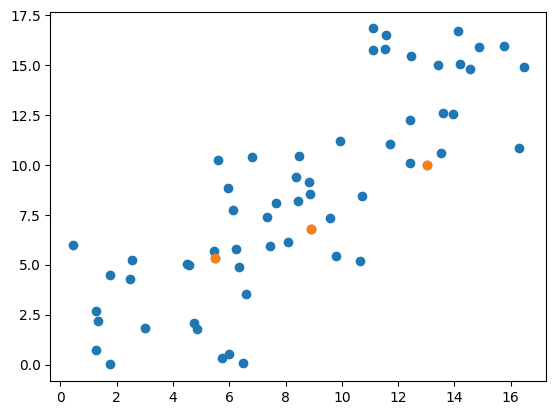

In [12]:
k=3
centroids = initialize_clusters(loaded_points,3)
plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])
plt.scatter(centroids[:,0],centroids[:,1])


In [13]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #
    #print(points)

    distances_array = np.linalg.norm(points - centroid, axis=1)


    ###################################

    return distances_array

In [14]:
distancetocentroid =  calculate_metric(loaded_points, centroids[1])

print(distancetocentroid)

[ 3.6072421   2.09321735  0.35960117  0.          0.96954609  5.07276863
  3.32063662  1.02928888  2.94595332  6.2492547   6.49716231  4.99774795
  4.27173183  5.33123207  4.96981411  5.20603749  3.19201685  3.81214452
  4.80996263  0.99097938  4.97960601  2.76140044  5.23248835  4.92327024
  4.57375576  5.08689115  2.49233153  6.09115271  3.51335632  4.10146616
  5.15261884  7.36201824  4.30307209  0.87925586  2.03755842  3.71137174
  3.55415964  5.93815145  4.6556256   2.7277345  12.73603755 14.56777717
 12.28222354 12.49838969 10.87258941 14.29498542 11.1143566   9.80230241
  9.59279672  8.41008505  8.88885269 13.04597574 13.10600151 11.82675234
 12.14046616 12.12126957 14.1392041  14.79074279 12.80719986  8.4476498 ]


In [15]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #
    distance0 = distancetocentroid =  calculate_metric(points, centroids_points[0])
    distance1 = distancetocentroid =  calculate_metric(points, centroids_points[1])
    distance2 = distancetocentroid =  calculate_metric(points, centroids_points[2])

    distances_array2 = np.asarray([calculate_metric(points, centroids) for centroids in centroids_points])

    distances_array = np.column_stack((distance0, distance1, distance2))
    ###################################

    return distances_array2

In [16]:
distance_array = compute_distances(loaded_points, centroids)
distance_array = distance_array.T
print(distance_array)

[[11.61217033  3.6072421   6.42664825]
 [ 9.14019159  2.09321735  3.97118786]
 [ 8.72447292  0.35960117  3.60927942]
 [ 8.88885269  0.          3.71137174]
 [ 8.43781821  0.96954609  3.18245656]
 [13.2173637   5.07276863  8.49079833]
 [11.47136889  3.32063662  6.25913711]
 [ 9.88920193  1.02928888  4.73719261]
 [11.52849613  2.94595332  6.54478972]
 [14.99742962  6.2492547   9.74104522]
 [15.07502977  6.49716231  9.83328746]
 [12.1234018   4.99774795  7.16677682]
 [12.93343353  4.27173183  7.67827127]
 [11.87810339  5.33123207  7.08846389]
 [13.85860082  4.96981411  8.6524195 ]
 [14.07981562  5.20603749  8.84761248]
 [12.02086467  3.19201685  6.89941198]
 [12.55508258  3.81214452  7.49535212]
 [11.79189368  4.80996263  6.85945424]
 [ 9.86190615  0.99097938  4.70164131]
 [ 4.70158226  4.97960601  2.66911726]
 [ 6.27414049  2.76140044  1.66707205]
 [ 6.24174751  5.23248835  4.1909656 ]
 [ 7.43664704  4.92327024  4.80199506]
 [ 4.35832568  4.57375576  0.89952502]
 [ 4.29522436  5.08689115

In [17]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=1)
    ###################################

    return assigned_centroids

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 0 2 1 2 2 1
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


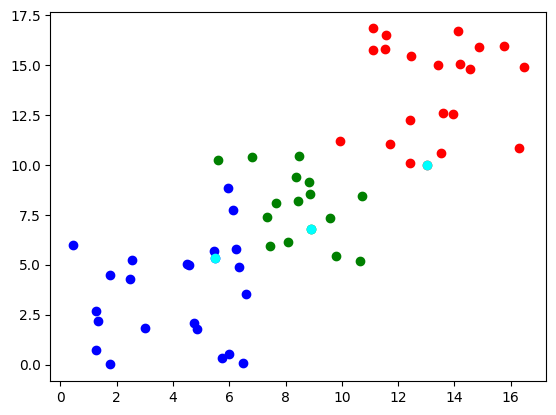

In [18]:
assined_centroids = assign_centroids(distance_array)

print(assined_centroids)

combined_array = np.column_stack((loaded_points, assined_centroids))
filtered_points0 = combined_array[combined_array[:, 2] == 0]
filtered_points1 = combined_array[combined_array[:, 2] == 1]
filtered_points2 = combined_array[combined_array[:, 2] == 2]


plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(centroids[:,0],centroids[:,1], color="cyan")

In [24]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    spocitat sumu chyb odchylky bodu od jejich centroidu

    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
    #combined_array = np.column_stack((distances, assined_centroids))

    objective_function_value = np.sum(distances[np.arange(60), assigned_centroids])

    ###################################

    return objective_function_value

In [25]:
calculate_objective(assined_centroids, distance_array)

200.5125161353738

In [27]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #
    new_centroids = np.vstack([
        points[assigned_centroids == k].mean(axis=0) if np.any(assigned_centroids == k) else np.zeros(points.shape[1])
        for k in range(k_clusters)
    ]).astype(np.float32)

    #new_clusters = np.array([])

    ###################################

    return new_centroids

[[13.241032  13.810114 ]
 [ 4.1294093  3.6682062]
 [ 8.474705   7.9485908]]


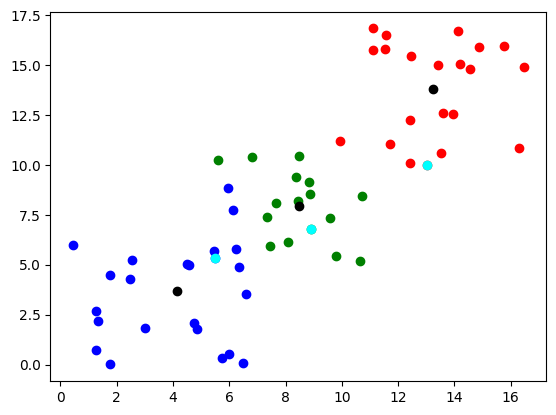

In [34]:
new_centroids = calculate_new_centroids(loaded_points, assined_centroids, k)
print(new_centroids)

plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(centroids[:,0],centroids[:,1], color="cyan")
plt.scatter(new_centroids[:,0],new_centroids[:,1], color="black")

In [99]:
def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    # Step 1: Randomly initialize centroids from the dataset
    #np.random.seed(42)  # For reproducibility
    centroid_points = initialize_clusters(points,k_clusters)
    iterace = 0

    for _ in range(n_of_iterations):
        # Step 2: Assign each point to the nearest centroid
        distances = compute_distances(points, centroid_points)  # (n, k_clusters)
        distances = distances.T
        assigned_centroids = assign_centroids(distances)  # (n,) closest centroid index for each point

        # Step 3: Compute new centroids as the mean of assigned points
        new_centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)

        # Step 4: Compute objective function (sum of squared distances)
        last_objective = calculate_objective(assigned_centroids, distances)

        # Step 5: Check for convergence
        if np.linalg.norm(new_centroids - centroid_points) < error:
            break

        centroid_points = new_centroids  # Update centroids
        iterace = iterace + 1

    ###################################

    return centroid_points.astype(np.float32), float(last_objective), iterace

6


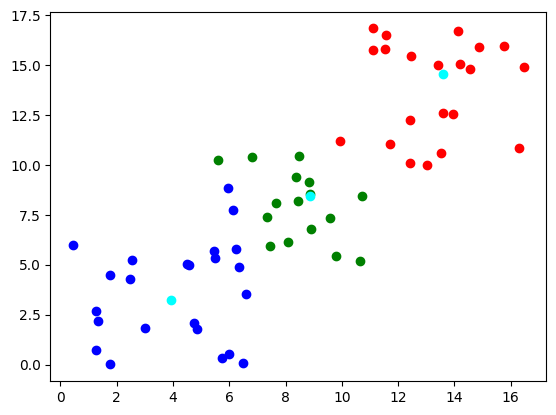

In [107]:
fitted_centroids, objective, iterace = fit(loaded_points, k, 1000, 0.001)
print(iterace)

plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(fitted_centroids[:,0],fitted_centroids[:,1], color="cyan")